# Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.



In [18]:

# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [19]:
crime = pd.read_csv("crime_data.csv")
crime

,statename,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [20]:
#standardization function - calculate z score
def std_fun(i):
    return (i-i.mean())/(i.std())

In [21]:
#Normalizeed dataa freme(considering the numeric part of the data)
df_norm = std_fun(crime.iloc[:,1:])
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,1.242564,0.782839,-0.520907,-0.003416
1,0.507862,1.106823,-1.211764,2.484203
2,0.071633,1.478803,0.998980,1.042878
3,0.232349,0.230868,-1.073593,-0.184917
4,0.278268,1.262814,1.758923,2.067820


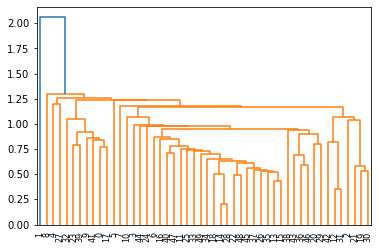

In [22]:
#create dendogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

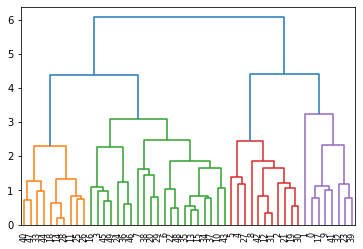

In [23]:
#create dendogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

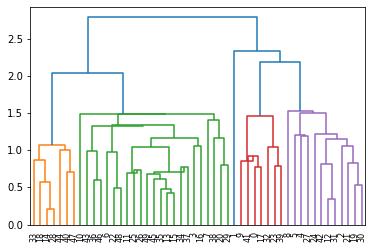

In [24]:
#create dendogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='centroid'))

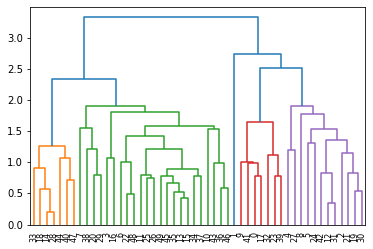

In [25]:
#create dendogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))

for this data complete data shows better dendrogram

In [26]:
#create clusters
hc = AgglomerativeClustering(n_clusters=4,affinity = 'euclidean', linkage = "complete")
hc

AgglomerativeClustering(linkage='complete', n_clusters=4)

first observation in the dendrogram cluster -0,

In [28]:
#save cluster for chart
y_hc = hc.fit_predict(df_norm)
y_hc

array([0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 1, 3, 2, 1, 3, 1, 1, 0, 3, 2, 1, 2,
       1, 0, 1, 3, 3, 2, 3, 1, 2, 2, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 2, 1,
       3, 1, 1, 3, 1, 1], dtype=int64)

In [29]:
#df_norm
crime['h_clusterid'] = pd.Series(y_hc)
crime

,statename,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


In [30]:
result = crime.iloc[:,1:].groupby(crime.h_clusterid).mean()
result

,Murder,Assault,UrbanPop,Rape,h_clusterid
h_clusterid,,,,,
0,14.087500,252.750000,53.500000,24.537500,0.0
1,5.871429,134.476190,70.761905,18.580952,1.0
2,11.054545,264.090909,79.090909,32.618182,2.0
3,3.180000,78.700000,49.300000,11.630000,3.0
